## Imports

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.preprocessing import normalize
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()
data_file = path.parent / "Data" / "sand.mat"

mat = scipy.io.loadmat(data_file)

X = mat['X']
y = mat['Y']

[n,p] = X.shape

### 3 Apply Partial Least Squares regression to the sand data.
> Load data sand.mat and run a cross validation of partial least squares regression to decide the number of components that is adequate to model the sand data. Plot both the cross validation error and the percentage of explained variance in
y to determine the number of components.

In [3]:
# Define PLS object
pls = PLSRegression()

# parameters for cross-validation
n_components = range(1,21)
param_grid = {
    'n_components': n_components
}

pls_grid = GridSearchCV(estimator = pls, param_grid = param_grid, cv = 10, verbose=2, n_jobs=-1, scoring=['neg_mean_squared_error', 'explained_variance'], refit='explained_variance')

# Fit the grid search model
pls_grid.fit(X, y)

# print best estimator
print(pls_grid.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
PLSRegression(n_components=7)


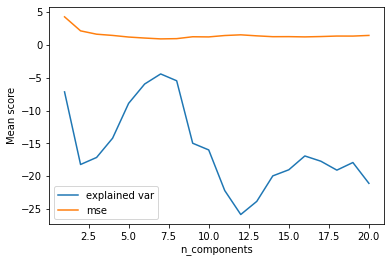

In [4]:
pls_explained_variance = pls_grid.cv_results_['mean_test_explained_variance']
# because gridsearch is configured that higher is better it uses negated mean squared error
pls_mse = pls_grid.cv_results_['mean_test_neg_mean_squared_error'] * -1 # convert to positive

plt.plot(n_components, pls_explained_variance, label='explained var')
plt.plot(n_components, pls_mse, label='mse')
plt.legend()
plt.xlabel('n_components')
plt.ylabel('Mean score')
plt.show()

 > b) How would you plot the coefficients of the final PLS regression model ($\beta$)? Which variables are important for the prediction of y? (In terms of loadings, remember the pitfall of PCA concerning scaled vs non-scaled loadings - this also holds for PLS).

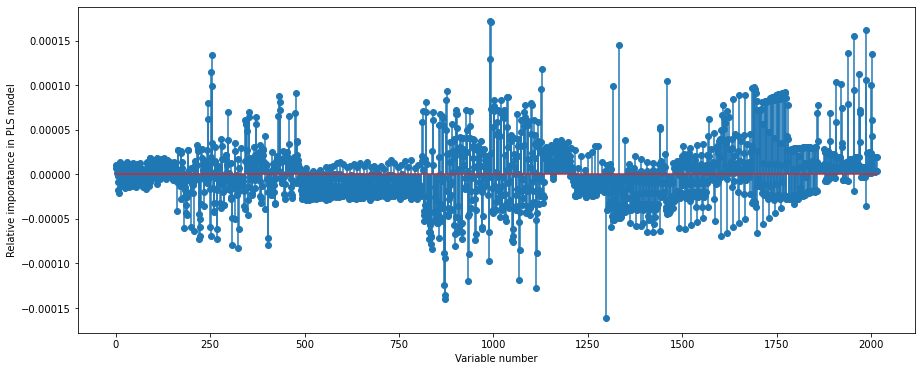

In [5]:
coef =pls_grid.best_estimator_.coef_

# A stem plot can be used to plot the betas
# plot the loadings - in order to compare these the variables should be
# normalized or at least on a comparable scale.
coef = coef/np.std(X)
plt.figure(figsize=(15, 6))

plt.xlabel('Variable number')
plt.ylabel('Relative imporatance in PLS model')
plt.stem(range(1,2017), coef, use_line_collection=True)
plt.show()